# Utah State Regulations and Twitter Sentiment

In [1]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np 
import plotly.graph_objects as go


In [2]:
covid = pd.read_csv("./../covid_cases/normalised_covid_deaths_cases.csv") 

print(covid.info())
covid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 13 columns):
date                    1530 non-null object
tot_cases               1530 non-null int64
new_case                1530 non-null int64
tot_death               1530 non-null int64
new_death               1530 non-null int64
State                   1530 non-null object
population_estimate     1530 non-null int64
state_abbreviation      1530 non-null object
normalized_tot_cases    1530 non-null float64
normalized_new_case     1530 non-null float64
normalized_tot_death    1530 non-null float64
normalized_new_death    1530 non-null float64
short_date              1530 non-null int64
dtypes: float64(4), int64(6), object(3)
memory usage: 155.5+ KB
None


,date,tot_cases,new_case,tot_death,new_death,State,population_estimate,state_abbreviation,normalized_tot_cases,normalized_new_case,normalized_tot_death,normalized_new_death,short_date
0,04/11/2020,293,15,7,1,North Dakota,761723,ND,0.384654,0.019692,0.009190,0.001313,11
1,04/14/2020,341,10,9,1,North Dakota,761723,ND,0.447669,0.013128,0.011815,0.001313,14
2,04/03/2020,173,14,3,0,North Dakota,761723,ND,0.227117,0.018379,0.003938,0.000000,3
3,04/05/2020,207,21,3,0,North Dakota,761723,ND,0.271752,0.027569,0.003938,0.000000,5
4,04/25/2020,803,55,16,1,North Dakota,761723,ND,1.054189,0.072205,0.021005,0.001313,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,04/04/2020,621,81,9,2,New Hampshire,1371246,NH,0.452873,0.059070,0.006563,0.001459,4
1526,04/01/2020,415,48,4,1,New Hampshire,1371246,NH,0.302644,0.035005,0.002917,0.000729,1
1527,04/20/2020,1447,55,42,1,New Hampshire,1371246,NH,1.055245,0.040110,0.030629,0.000729,20
1528,04/23/2020,1670,82,51,3,New Hampshire,1371246,NH,1.217870,0.059800,0.037192,0.002188,23


In [3]:
covid.sort_values(by='date',inplace=True)

In [4]:
sentiment = pd.read_csv('./../covid_cases/april_average_sentiment.csv')
sentiment

,sentiment,magnitude,state,date
0,-0.164179,0.700000,AK,1
1,-0.155914,0.640246,AL,1
2,-0.179669,0.676359,AR,1
3,-0.170283,0.675881,AZ,1
4,-0.167857,0.680188,CA,1
...,...,...,...,...
1495,-0.142558,0.710310,VA,30
1496,-0.182609,0.866667,VT,30
1497,-0.105985,0.663175,WA,30
1498,-0.155979,0.735009,WI,30


## Plotting sentiment

In [6]:
utah_covid = covid[covid['state_abbreviation']=='UT']
utah_sentiment = sentiment[sentiment['state']=='UT']


In [7]:
utah_sentiment

,sentiment,magnitude,state,date
44,-0.139954,0.752887,UT,1
94,-0.158649,0.673243,UT,2
144,-0.136316,0.721316,UT,3
194,-0.146809,0.712766,UT,4
244,-0.122963,0.618025,UT,5
294,-0.114452,0.682751,UT,6
344,-0.094226,0.644094,UT,7
394,-0.113614,0.626238,UT,8
444,-0.089583,0.636458,UT,9
494,-0.134746,0.724576,UT,10


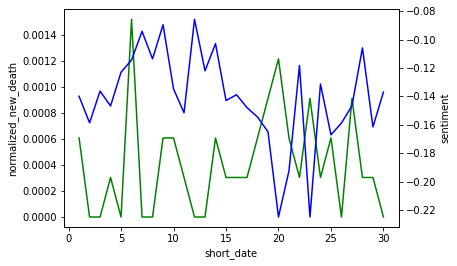

In [8]:
sns.lineplot(y=utah_covid['normalized_new_death'], x=utah_covid['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= utah_sentiment['sentiment'], x = utah_sentiment['date'], color="b", ax=ax2)

We add the regulation data and plot the occurences of regulation start dates to see if there is a link

In [14]:
utah_regulations = pd.read_csv('./utah_regulation_data.csv', names=["Policy ID","Province","Event Description","Date Policy Announced","Date Policy Start","Date Policy End","Policy Category"])
utah_regulations

,Policy ID,Province,Event Description,Date Policy Announced,Date Policy Start,Date Policy End,Policy Category
0,6268805,Utah,"State Orders Restaurants, Bars to Suspend Dine...",17/03/2020,19/03/2020,02/04/2020,Restriction and Regulation of Businesses
1,1966160,Utah,State of Utah Restricts Non-urgent Surgeries o...,24/03/2020,25/03/2020,25/04/2020,Restriction and Regulation of Government Services
2,8986806,Utah,"Gov. Gary R. Herbert of Utah, USA, has issued ...",01/04/2020,01/04/2020,15/05/2020,Social Distancing
3,6604464,Utah,Steward Health Care offers COVID-19 drive-thro...,06/04/2020,06/04/2020,NaN,Health Testing
4,9130617,Utah,"Utah, USA will, for the first time, deploy a t...",09/04/2020,09/04/2020,13/04/2020,Internal Border Restrictions
5,4758774,Utah,"Gov. Herbert of Utah, USA, on April 9 2020, ha...",09/04/2020,10/04/2020,01/05/2020,Internal Border Restrictions
6,9130617,Utah,"Utah, USA will use electronic message boards i...",09/04/2020,13/04/2020,13/04/2020,Internal Border Restrictions
7,2376179,Utah,"Gov. Gary Herbert, of Utah, USA, along with st...",14/04/2020,14/04/2020,22/05/2020,Closure and Regulation of Schools
8,2376179,Utah,"Gov. Gary Herbert, of Utah, USA, along with st...",14/04/2020,14/04/2020,22/05/2020,Closure and Regulation of Schools


In [15]:
# adding a column with a shortened version of the date to make it easier to plot
utah_regulations['short_start_date'] = utah_regulations.apply(lambda row: row['Date Policy Start'][:2], axis=1)
utah_regulations

,Policy ID,Province,Event Description,Date Policy Announced,Date Policy Start,Date Policy End,Policy Category,short_start_date
0,6268805,Utah,"State Orders Restaurants, Bars to Suspend Dine...",17/03/2020,19/03/2020,02/04/2020,Restriction and Regulation of Businesses,19
1,1966160,Utah,State of Utah Restricts Non-urgent Surgeries o...,24/03/2020,25/03/2020,25/04/2020,Restriction and Regulation of Government Services,25
2,8986806,Utah,"Gov. Gary R. Herbert of Utah, USA, has issued ...",01/04/2020,01/04/2020,15/05/2020,Social Distancing,01
3,6604464,Utah,Steward Health Care offers COVID-19 drive-thro...,06/04/2020,06/04/2020,NaN,Health Testing,06
4,9130617,Utah,"Utah, USA will, for the first time, deploy a t...",09/04/2020,09/04/2020,13/04/2020,Internal Border Restrictions,09
5,4758774,Utah,"Gov. Herbert of Utah, USA, on April 9 2020, ha...",09/04/2020,10/04/2020,01/05/2020,Internal Border Restrictions,10
6,9130617,Utah,"Utah, USA will use electronic message boards i...",09/04/2020,13/04/2020,13/04/2020,Internal Border Restrictions,13
7,2376179,Utah,"Gov. Gary Herbert, of Utah, USA, along with st...",14/04/2020,14/04/2020,22/05/2020,Closure and Regulation of Schools,14
8,2376179,Utah,"Gov. Gary Herbert, of Utah, USA, along with st...",14/04/2020,14/04/2020,22/05/2020,Closure and Regulation of Schools,14


In [17]:
#grouping all the regulations that occurred on the same day together
utah_regulations = utah_regulations.groupby(['short_start_date'])['Event Description'].apply('<br><br>'.join).reset_index()

In [18]:
#inserting line breaks in text description to make it easier to read
#https://stackoverflow.com/questions/2657693/insert-a-newline-character-every-64-characters-using-python
"""
def insert_newlines(string, every=70):
    return '<br>'.join(string[i:i+every] for i in range(0, len(string), every))

colorado_regulations['description'] = colorado_regulations.apply(lambda row : insert_newlines(row['Event Description']), axis=1)
colorado_regulations
"""

import textwrap 
utah_regulations['description']=utah_regulations["Event Description"].apply(
    lambda t: "<br>".join(textwrap.wrap(t))
)


In [19]:
utah_regulations

,short_start_date,Event Description,description
0,01,"Gov. Gary R. Herbert of Utah, USA, has issued ...","Gov. Gary R. Herbert of Utah, USA, has issued ..."
1,06,Steward Health Care offers COVID-19 drive-thro...,Steward Health Care offers COVID-19 drive-thro...
2,09,"Utah, USA will, for the first time, deploy a t...","Utah, USA will, for the first time, deploy a t..."
3,10,"Gov. Herbert of Utah, USA, on April 9 2020, ha...","Gov. Herbert of Utah, USA, on April 9 2020, ha..."
4,13,"Utah, USA will use electronic message boards i...","Utah, USA will use electronic message boards i..."
5,14,"Gov. Gary Herbert, of Utah, USA, along with st...","Gov. Gary Herbert, of Utah, USA, along with st..."
6,19,"State Orders Restaurants, Bars to Suspend Dine...","State Orders Restaurants, Bars to Suspend Dine..."
7,25,State of Utah Restricts Non-urgent Surgeries o...,State of Utah Restricts Non-urgent Surgeries o...


In [20]:
start_dates = utah_regulations['short_start_date']

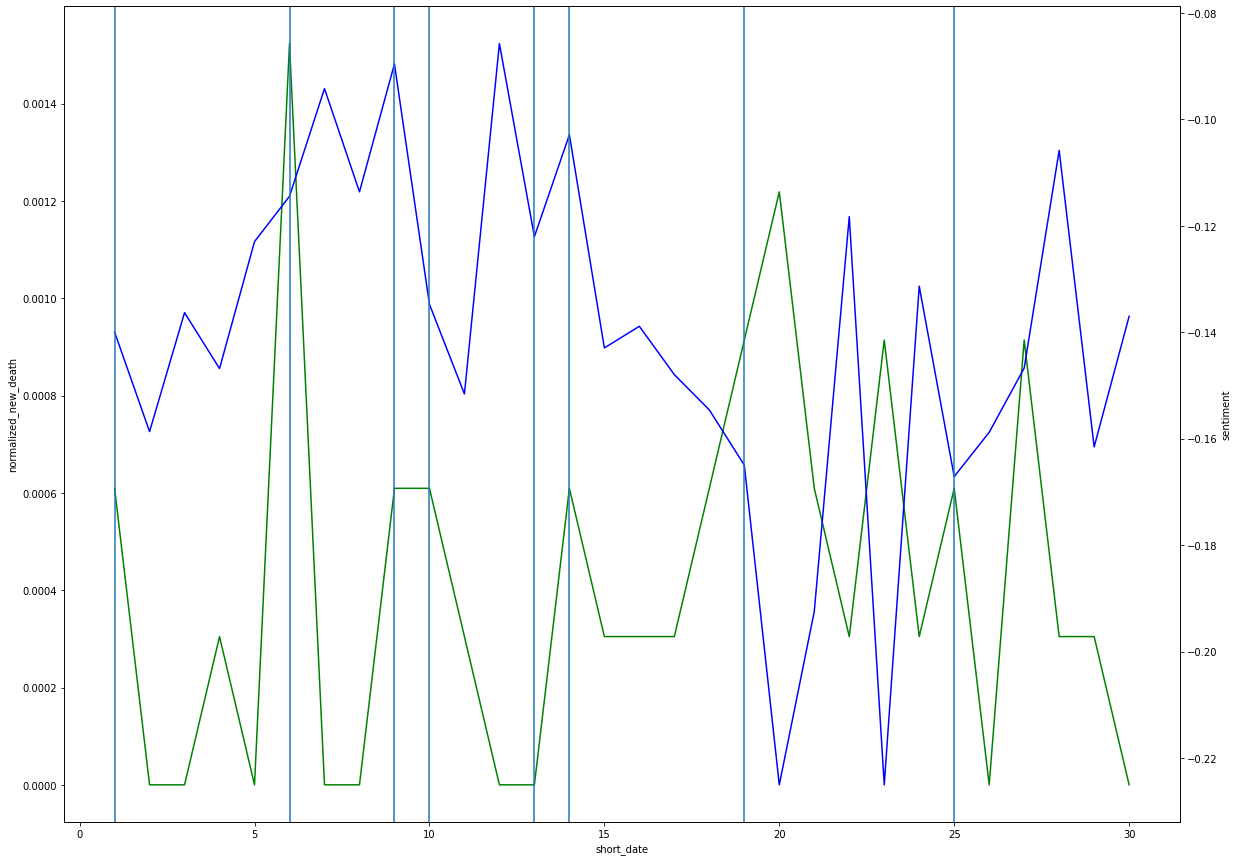

In [21]:
# plotting sentiment with vertical lines when regulations were started
plt.figure(figsize=(20,15))
sns.lineplot(y=utah_covid['normalized_new_death'], x=utah_covid['short_date'] , color="g")
ax2 = plt.twinx()
sns.lineplot(y= utah_sentiment['sentiment'], x = utah_sentiment['date'], color="b", ax=ax2)
for date in start_dates:
    date = int(date)
    plt.axvline(x=date)
plt.show()

Plotly can give us an interactive version

In [35]:
fig = go.Figure(data=go.Scatter(x=utah_sentiment['date'], y=utah_sentiment['sentiment'], name='Average Twitter Sentiment'))

#https://plotly.com/python/horizontal-vertical-shapes/
#https://plotly.com/python/hover-text-and-formatting/#customizing-hover-text-with-plotly-express

#add a dummy variable to plot events
fig.add_trace(go.Scatter(x=utah_regulations['short_start_date'], y=[-0.13]*len(utah_regulations), mode='markers', hoverinfo = 'text', hovertemplate = '<b>Regulation(s), %{x}/04/2020</b>:<br>'+'%{text}'+'<extra></extra>', text = utah_regulations['description'], name='Regulation (hover on dot)'))



for date in start_dates:
    date = int(date)
    fig.add_vline(x=date, line_width=1, line_color="red")

fig.update_layout(
    title="Utah State Regulations and COVID Twitter Sentiment, April 2020",
    xaxis_title="Date in April 2020",
    yaxis_title="Average Twitter Sentiment in Utah",
    width=900,
    height=550,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=200,
        pad=4
    )
    )
fig.show()


In [36]:
#save html
fig.write_html("./utah_regulations_sentiment.html")

_________________________________________________________________________________________________________________

## Calculating correlation
* we use a point biserial correlation since we have a continuous variable (sentiment), and a binary/dichotomous variable (regulation started or not)

In [25]:
#import library
from scipy import stats

In [26]:
int_start_dates = [int(i) for i in start_dates]
int_start_dates

[1, 6, 9, 10, 13, 14, 19, 25]

In [27]:
#creating a list of the days in april and whether there was a regulation (1) or not (0)

regulation_days = []

for day in range(1,31):
    if day in int_start_dates:
        regulation_days.append(1)
    else:
        regulation_days.append(0)

regulation_days
        

[1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [28]:
utah_sentiment[['sentiment','date']]

,sentiment,date
44,-0.139954,1
94,-0.158649,2
144,-0.136316,3
194,-0.146809,4
244,-0.122963,5
294,-0.114452,6
344,-0.094226,7
394,-0.113614,8
444,-0.089583,9
494,-0.134746,10


In [29]:
corr, p_val = stats.pointbiserialr(utah_sentiment['sentiment'], regulation_days)
print('Correlation coefficient: {}, P-value: {}'.format(corr, p_val))

Correlation coefficient: 0.21126929540968525, P-value: 0.26241228249926224
